<a href="https://colab.research.google.com/github/Bk4617/Gan-for-handwritten-digits/blob/main/crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset from the specified path
file_path = '/content/drive/MyDrive/Colab Notebooks/Minor /Crop_recommendation.csv'
df = pd.read_csv(file_path)

In [ ]:
from google.colab import drive
import joblib

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load the LabelEncoder used during training
label_encoder_path = '/content/drive/MyDrive/Colab Notebooks/Minor/label_encoder.pkl'
try:
    label_encoder = joblib.load(label_encoder_path)
    print("LabelEncoder loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{label_encoder_path}' not found. Please verify the file path.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
LabelEncoder loaded successfully.


In [ ]:
# Get the description of the dataset
description = df.describe()
print(description)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [ ]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)



N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# Check data types of each column
data_types = df.dtypes
print(data_types)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [ ]:
import os

# Directory path
directory_path = '/content/drive/MyDrive/Colab Notebooks/Minor'

# Create directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory created: {directory_path}")
else:
    print(f"Directory already exists: {directory_path}")


Directory created: /content/drive/MyDrive/Colab Notebooks/Minor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best Parameters: {'decision_tree__max_depth': 10, 'knn__n_neighbors': 5, 'knn__weights': 'uniform', 'random_forest__max_depth': 10, 'random_forest__n_estimators': 20, 'svm__C': 0.1, 'svm__kernel': 'linear'}
Accuracy: 98.86%
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00  

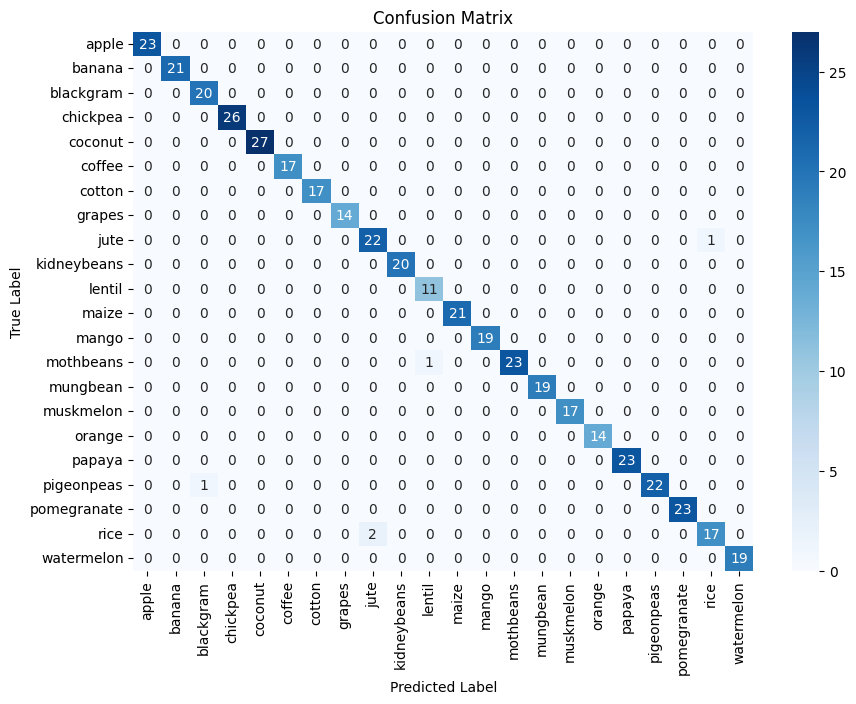

Model saved as /content/drive/MyDrive/Colab Notebooks/minor/stacking_model.h5
Enter the following values for prediction:
Enter Nitrogen (N) value: 34
Enter Phosphorus (P) value: 45
Enter Potassium (K) value: 66
Enter Temperature value (in Celsius): 26
Enter Humidity value (%): 70
Enter pH value: 6
Enter Rainfall value (in mm): 200
Predicted Crop: papaya


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Minor /Crop_recommendation.csv'
df = pd.read_csv(file_path)

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier())
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Define hyperparameters to tune for base models
param_grid = {
    'decision_tree__max_depth': [10],
    'random_forest__n_estimators': [20],
    'random_forest__max_depth': [10],
    'svm__C': [0.1],
    'svm__kernel': ['linear'],
    'knn__n_neighbors': [5],
    'knn__weights': ['uniform']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(stacking_model, param_grid, cv=4, n_jobs=-1, verbose=1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(class_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot and save the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/minor/confusion_matrix.png')
plt.show()

# Save the best model
model_filename = '/content/drive/MyDrive/Colab Notebooks/minor/stacking_model.h5'
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

# Function for testing new inputs
def predict_new_inputs():
    print("Enter the following values for prediction:")
    N = float(input("Enter Nitrogen (N) value: "))
    P = float(input("Enter Phosphorus (P) value: "))
    K = float(input("Enter Potassium (K) value: "))
    temperature = float(input("Enter Temperature value (in Celsius): "))
    humidity = float(input("Enter Humidity value (%): "))
    ph = float(input("Enter pH value: "))
    rainfall = float(input("Enter Rainfall value (in mm): "))

    # Create a dictionary of input data
    new_data = {
        'N': [N],
        'P': [P],
        'K': [K],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [ph],
        'rainfall': [rainfall]
    }

    # Convert to DataFrame and make predictions
    new_data_df = pd.DataFrame(new_data)
    predictions_encoded = best_model.predict(new_data_df)
    predictions = label_encoder.inverse_transform(predictions_encoded)

    print(f"Predicted Crop: {predictions[0]}")

# Example usage of the prediction function
predict_new_inputs()
